# ➤ 1- Data Loading & Exploring

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df = pd.read_csv('/content/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# ➤ 2- EDA

In [4]:
df.drop(['loan_id'], axis=1, inplace=True)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [6]:
# Getting categ cols and plotting them.
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())

Categorical columns: [' education', ' self_employed', ' loan_status']


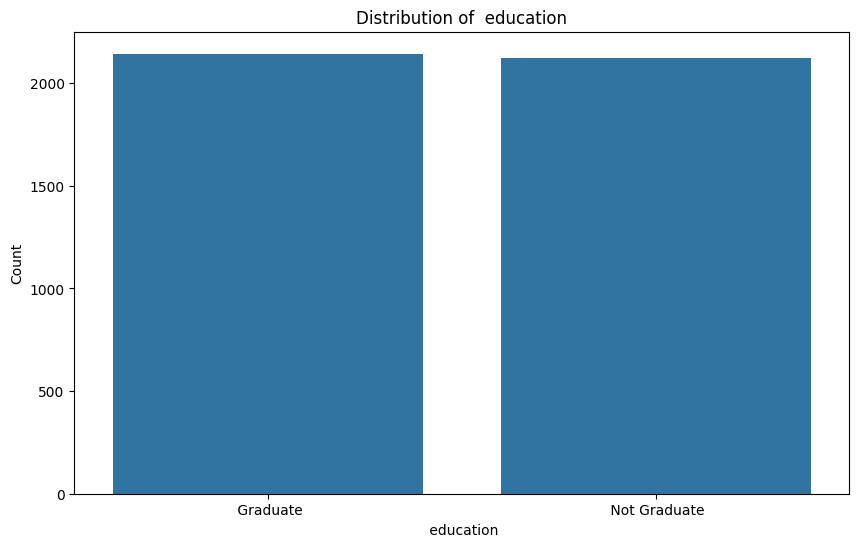

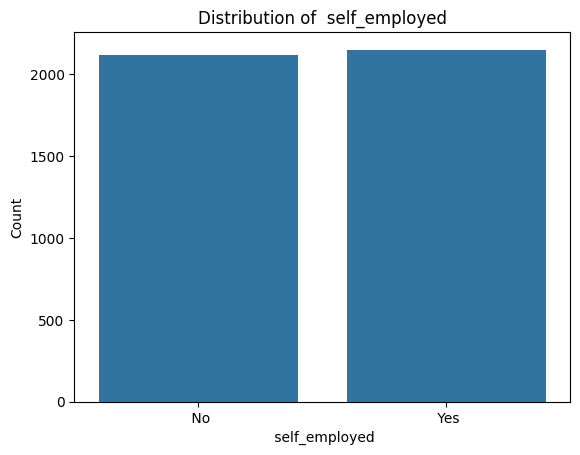

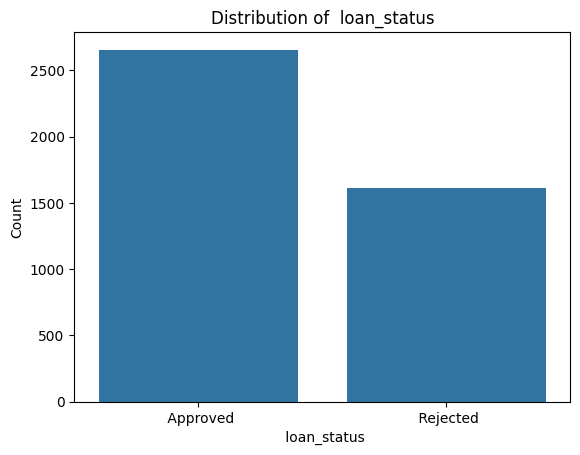

In [7]:
plt.figure(figsize= (10, 6))
for i, col in enumerate(categorical_cols, 1):
  sns.countplot(data= df, x= col)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

In [8]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [9]:
le = LabelEncoder()
for cols in categorical_cols:
    df[cols] = le.fit_transform(df[cols])
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    education                 4269 non-null   int64
 2    self_employed             4269 non-null   int64
 3    income_annum              4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
 11   loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


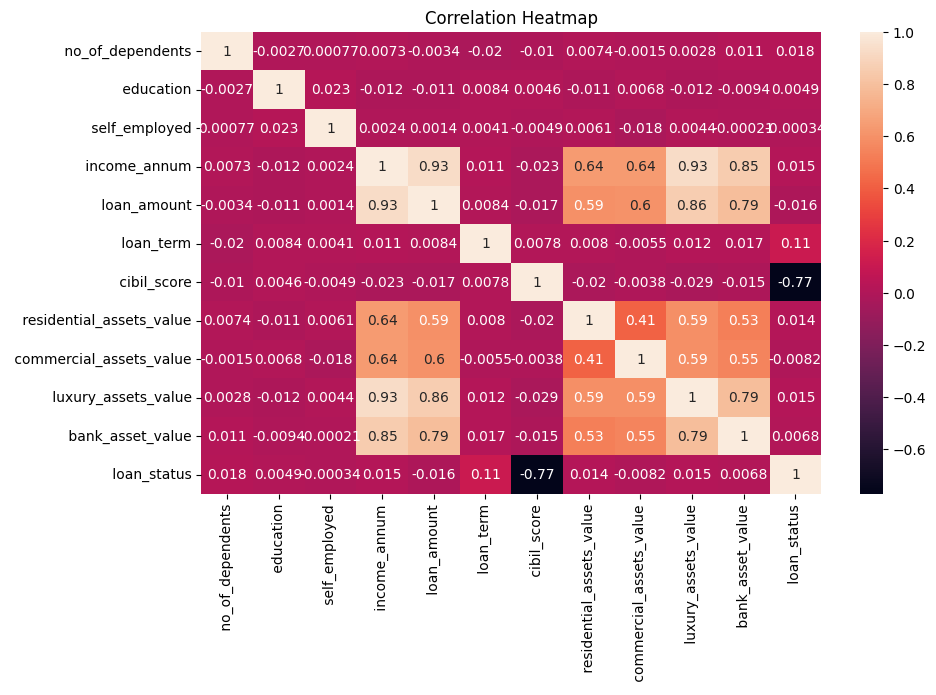

In [11]:
# Correlation Matrix.
plt.figure(figsize= (10, 6))
sns.heatmap(df.corr(), annot= True)
plt.title('Correlation Heatmap')
plt.show()

# ➤ 3- Data Splitting & First Model Selection

In [12]:
x = df.drop([' loan_status'], axis=1)
y = df[' loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [13]:
model1 = LogisticRegression(max_iter= 500)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

# ✔️ Bonus Work:




# ⭕ First Model Evaluation

In [14]:
print(f"Precision: {precision_score(y_test, y_pred1):.3f}")
print(f"Recall: {recall_score(y_test, y_pred1):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred1):.3f}")

Precision: 0.802
Recall: 0.610
F1-score: 0.693


# ⭕ Second Model Selection

In [15]:
model2 = DecisionTreeClassifier(random_state= 42)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

# ⭕ Second Model Evaluation

In [16]:
print(f"Precision: {precision_score(y_test, y_pred2):.3f}")
print(f"Recall: {recall_score(y_test, y_pred2):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred2):.3f}")

Precision: 0.972
Recall: 0.969
F1-score: 0.970


# ⭕ Logistics Reg VS Decision Tree.

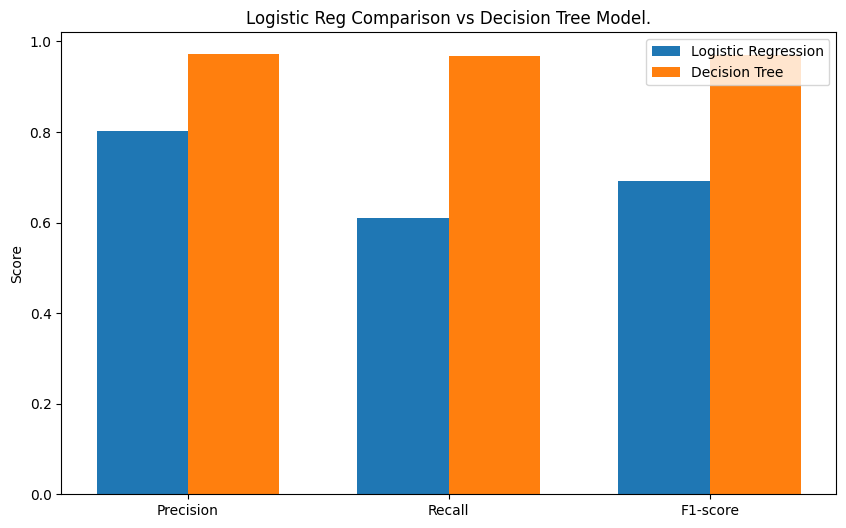

In [17]:
metrics = ['Precision', 'Recall', 'F1-score']
model1_scores = [precision_score(y_test, y_pred1), recall_score(y_test, y_pred1), f1_score(y_test, y_pred1)]
model2_scores = [precision_score(y_test, y_pred2), recall_score(y_test, y_pred2), f1_score(y_test, y_pred2)]

x_pos = np.arange(len(metrics)) # creates numpy array of len of metrics.

plt.figure(figsize=(10, 6))
bar_width = 0.35

# This sets the left edge of bars of Logistic Reg so next models bar's can be placed next to it.
plt.bar(x_pos - bar_width/2, model1_scores, bar_width, label='Logistic Regression')
plt.bar(x_pos + bar_width/2, model2_scores, bar_width, label='Decision Tree')

plt.ylabel('Score')
plt.title('Logistic Reg Comparison vs Decision Tree Model.')
plt.xticks(x_pos, metrics)
plt.legend()
plt.show()

# ⭕ Performing SMOTE(Synthetic Minority Oversampling Technique)

In [18]:
sm = SMOTE(random_state= 42)
x_resampled, y_resampled = sm.fit_resample(x, y)

Class Dist Before SMOTE Counter({0: 2656, 1: 1613})
Class Dist After SMOTE Counter({0: 2656, 1: 2656})


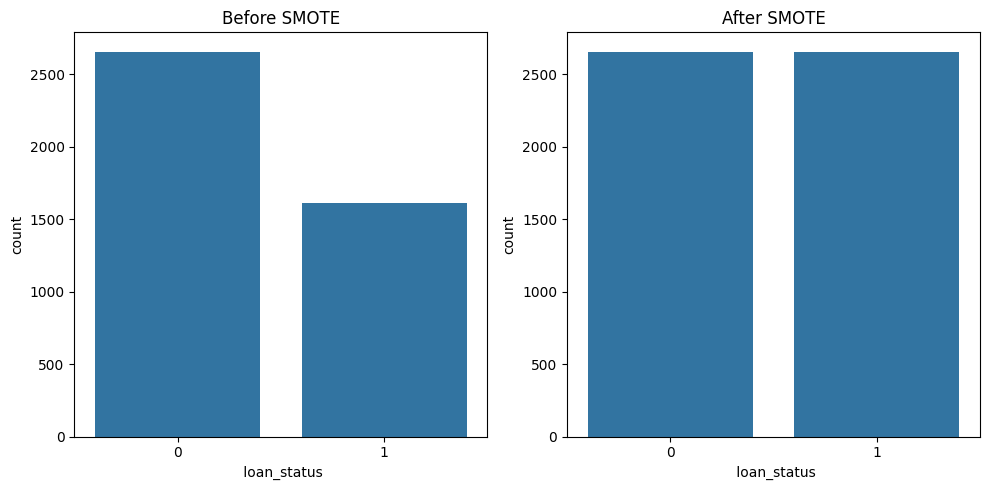

In [19]:
print('Class Dist Before SMOTE', Counter(y))
print('Class Dist After SMOTE', Counter(y_resampled))

fig ,axs = plt.subplots(1, 2, figsize= (10, 5))
sns.countplot(x= y, ax= axs[0])
axs[0].set_title('Before SMOTE')
sns.countplot(x= y_resampled, ax= axs[1])
axs[1].set_title('After SMOTE')
plt.tight_layout()
plt.show()